<a href="https://colab.research.google.com/github/menezesglesia/Tarefas-P-s/blob/main/Glesia%20Alves%20Menezes%20-%20Trilha%206%20-%20RI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#packages
!pip install unidecode
!pip install fraction

# Load EDA Pkgs
import pandas as pd
import numpy as np
import random

# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')

#charts & others stuff
from unidecode import unidecode
import matplotlib.pyplot as plt
import re
import string
from fractions import Fraction



     |████████████████████████████████| 235 kB 5.3 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [34]:
#Monta-se os dados que queremos verificar em um DataFrame Pandas
texto_verificar = np.array([
                            #("Thays Oyama", "Leite avan\u00e7a em S\u00e3o Paulo, campo de Doria e estado decisivo nas pr\u00e9vias", "\nOs olhos dos tucanos se voltam para S\u00e3o Paulo.\nNo in\u00edcio da disputa para ver quem seria o candidato do PSDB \u00e0 Presid\u00eancia da Rep\u00fablica, o estado governado por \nJo\u00e3o Doria\n era visto como seu dom\u00ednio inatac\u00e1vel.\n \nE por ser o de maior peso na complicada matem\u00e1tica das pr\u00e9vias tucanas, ele conferia ao governador larga vantagem sobre seu colega ga\u00facho e principal rival na disputa, Eduardo Leite.\nOcorre que, desde o in\u00edcio de outubro \u2014 logo depois que o senador Tasso Jereissati anunciou sua retirada do p\u00e1reo para apoiar Leite \u2014 o nome do governador ga\u00facho passou a conquistar apoios na fortaleza do seu concorrente.\n \nAl\u00e9m do ex-governador de S\u00e3o Paulo Geraldo Alckmin, do senador Jos\u00e9 Anibal e do prefeito de S\u00e3o Jos\u00e9 dos Campos, Felicio Ramuth, declararam apoio a Leite nas \u00faltimas semanas vereadores de munic\u00edpios paulistas; o prefeito de Santo Andr\u00e9, Paulo Serra; e o vice-prefeito de Cap\u00e3o Bonito, Roberto Tamura.\nO apoio de pol\u00edticos aos pr\u00e9-candidatos nas pr\u00e9vias \u00e9 relevante porque o regulamento do PSDB atribui pesos diferentes n\u00e3o s\u00f3 aos diversos estados da federa\u00e7\u00e3o, mas tamb\u00e9m \u00e0s categorias de eleitores: o voto de um prefeito, por exemplo, pode equivaler ao voto de at\u00e9 300 filiados, ou \"militantes\".\nEm n\u00famero de diret\u00f3rios estaduais aliados, Leite, que j\u00e1 estava \u00e0 frente de Doria desde o in\u00edcio do processo, nesta semana conquistou a ades\u00e3o tamb\u00e9m do Rio de Janeiro, al\u00e9m de ter avan\u00e7ado em Goi\u00e1s. Doria manteve os diret\u00f3rios que tinha e agora briga para consolidar a ades\u00e3o do Rio Grande do Norte e Sergipe.\nA pr\u00f3xima batalha entre Doria e Leite se dar\u00e1 na pr\u00f3xima ter\u00e7a-feira, quando o Grupo Globo promove no Rio de Janeiro o primeiro debate entre os candidatos nas pr\u00e9vias do PSDB, incluindo o ex-prefeito de Manaus, Arthur Virg\u00edlio.\nO encontro \u00e9 considerado importante sobretudo pelo impacto midi\u00e1tico que poder\u00e1 produzir.\nAnalistas consideram que o resultado das pr\u00e9vias tucanas ter\u00e1 a natureza das \"profecias autorrealiz\u00e1veis\": vai ganhar quem a maioria \"achar\" que vai ganhar.\nEm outras palavras, o candidato que conseguir convencer o eleitorado de que tem mais chances de levar as pr\u00e9vias sair\u00e1 delas n\u00e3o apenas vitorioso, mas com larga vantagem sobre o perdedor.\nNuma disputa que definir\u00e1, al\u00e9m do nome do PSDB que concorrer\u00e1 \u00e0")
                            ("Desconhecido", "Publicação de Arnaldo Jabor", "Bolsonaro é um tipo de cara sem etiqueta, daqueles que encontramos coçando o saco no barzinho jogando bilhar. Apesar de ter mais estudo do que qualquer professor de humanas da geração Paulo Freire e mais inteligência emocional do que qualquer outro político brasileiro, não há polidez em suas palavras e tão pouco elegância em seu comportamento. Isso é o que mais incomoda artistas, jornalistas, feministas mal amadas e complexadas, homens frágeis, covardes oportunistas, religiosos falidos na luta contra a própria imoralidade, maconheiros, pedófilos, estupradores e toda patrulha do politicamente correto que suportou calada um circo de corrupção durante duas décadas, mas que agora é ferida com as palavras do presidente “não pudico”. Bolsonaro é o milico com piadinhas sem graça, é o tiozão que pergunta se já temos pentelho, é um elefante em uma loja de cristais, mas o que me faz a cada dia gostar mais desse cara, é o tipo de gente que não gosta dele, que se ofende com tudo que o cara faz, que do óleo venezuelano em nossas praias à histeria mundial perante o coronavírus, buscam um meio de responsabilizá-lo. Bolsonaro realmente é o cara que você passa gostar, quando vê o lixo de gente que não gosta dele."),
                            ("Desconhecido", "Crônica inteligente de Arnaldo Jabor", "Brasileiro… Brasileiro é um povo solidário. Mentira. Brasileiro é babaca. Eleger para o cargo mais importante do Estado um sujeito que não tem escolaridade e preparo nem para ser gari, só porque tem uma história de vida sofrida; Pagar 40% de sua renda em tributos e ainda dar esmola para pobre na rua ao invés de cobrar do governo uma solução para pobreza;\nAceitar que ONG’s de direitos humanos fiquem dando pitaco na forma como tratamos nossa criminalidade… Não protestar cada vez que o governo compra colchões para presidiários que queimaram os deles de propósito, não é coisa de gente solidária. É coisa de gente otária.\nBrasileiro é um povo alegre. Mentira. Brasileiro é bobalhão. Fazer piadinha com as imundices que acompanhamos todo dia é o mesmo que tomar bofetada na cara e dar risada. Depois de um massacre que durou quatro dias em São Paulo, ouvir o José Simão fazer piadinha a respeito e achar graça, é o mesmo que contar piada no enterro do pai. Brasileiro tem um sério problema. Quando surge um escândalo, ao invés de protestar e tomar providências como cidadão, ri feito bobo."),
                            ("Arnaldo Jabor CBN", "Muita gente quer votar em Bolsonaro para se vingar", "Amigos ouvintes, vocês assistiram aos debates dos jornalistas com os candidatos Jair Bolsonaro e Marina Silva. Não, pois perderam a chance de ver o absurdo que se avizinha no horizonte com nossos possíveis eleitos para presidência. É incrível. Primeiro Bolsonaro no programa Roda Viva foi um show de absurdos. Uma janelinha aberta para vermos a incompetência do homem. Creio também que os jornalistas, que são todos ótimos aliás, perderam a chance de fazer perguntas que decifrassem o enigma de sua utopia de caserna. O tempo todo ele se defendeu com a velha técnica dos reacionários sem razão que falam bem rápido, confusamente, de propósito para deixar a impressão de que algo foi respondido quando nada aconteceu. A maioria das perguntas tinha por fito provar que o Bolsonaro é um despreparado, careta, preconceituoso, racista, etc. E perguntaram sobre aborto, mundo gay, estupro, relação com mulheres. Mas poderiam ter perguntado sobre o que planos ele teria pelo seu eventual governo. O povo que poderá votar nele está preocupado se ele gosta de gay ou não. Se aborto pode ou não pode. Ora francamente o povão bolsonarista quer denúncias violentas, ameaças machistas contra o crime que era uma espécie de trumpzinho de gericinó, dizendo que vai botar pra quebrar. E o maior perigo é que muita gente ignorante vai votar nele para se vingar do Brasil. Isso! Esse Brasil está em crise e o que muitos querem quebrar. De raiva. Isso é muito perigoso. \nEu vi também a entrevista que a Marina Silva deu para outro grupo de jornalistas no dia seguinte. Meu Deus! Que coisa mais frágil! Que coisa mais pobre de ideias. Que coisa triste ver aquela boa mulher de ótimo caráter sem dúvida, mas sentadinha ali com sua vozinha falando em ética e ideias gerais sobre o país e visivelmente tentando encontrar um caminho entre um liberalismo maior e pequenas reverências aos petistas perdidos. Uma senhora sem força para ser presidente e um neonazista sem rumo. Não há um só programinha para o país dessa gente. Realmente é de gelar o sangue. O Brasil com candidatos risíveis, de chanchada, sem contar com os outros que vem aí como perigosíssimo Ciro Gomes. É triste pois como dizia um amigo meu o Brasil não tem pessoal.")
])
df_ver = pd.DataFrame(data=texto_verificar, columns=["author", 'title', "content"])
df_ver.head()

,author,title,content
0,Desconhecido,Publicação de Arnaldo Jabor,"Bolsonaro é um tipo de cara sem etiqueta, daqu..."
1,Desconhecido,Crônica inteligente de Arnaldo Jabor,Brasileiro… Brasileiro é um povo solidário. Me...
2,Arnaldo Jabor CBN,Muita gente quer votar em Bolsonaro para se vi...,"Amigos ouvintes, vocês assistiram aos debates ..."


## Carregando artigos

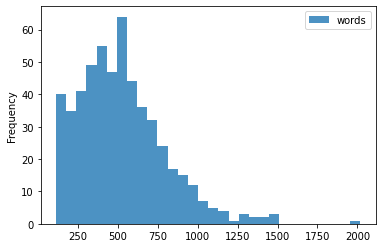

In [77]:
#Carrega o texto em um DataFrame PAndas
#df_aj = pd.read_json("https://raw.githubusercontent.com/lucianomcsilva/robo_aj/master/arnaldo_jabor.json")
# df_aj = pd.read_json("UolBlogs.json")
# df_aj = df_aj.loc[df_aj['author'] == 'Juca Kfouri' ]
df_aj = pd.read_json('https://raw.githubusercontent.com/lucianomcsilva/articulistas/main/UolBlogs.json')
df_aj = df_aj.loc[df_aj['author'] == 'Kennedy Alencar' ]

#Faz a contagem de palavras por cada linha do artigo
df_aj['words'] = df_aj['content'].str.split().str.len()

#Elimina qualquer artigo que tenha gerado menos de 100 palavras
df_aj = df_aj.loc[(df_aj['words'] > 100)]

#Plota o DataFrame em histograma para uma avaliação
df_aj.plot.hist(bins=30, alpha=0.8)



## mesmo tratmento da trilha anterior de limpeza do texto

### Limpeza

In [78]:
stop = stopwords.words('portuguese')
# stop.append('nao')
stop2 = list()
for word in stop:
  stop2.append(unidecode(word))
  
stemmer = nltk.stem.RSLPStemmer()

In [79]:
# remoção de palavras de parada
df_aj['content_treated'] = df_aj['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_ver['content_treated'] = df_ver['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


#FAzendo Steammer
# df['content_treated'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# df_aj['content_treated'] = df_aj['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# df_ver['content_treated'] = df_ver['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

#Transforma em minuscula e remoção de acentos 
df_aj['content_treated'] = df_aj['content_treated'].str.lower().apply(lambda x: unidecode(x))
df_ver['content_treated'] = df_ver['content_treated'].str.lower().apply(lambda x: unidecode(x))

# remocação de pontuaçao
df_aj['content_treated'] = df_aj['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

# remocação de numeros
df_aj['content_treated'] = df_aj['content_treated'].str.replace('[{}]'.format(string.digits), '')
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada (repescagem)
df_aj['content_treated'] = df_aj['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))
df_ver['content_treated'] = df_ver['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03889b6390>,
      dtype=object)

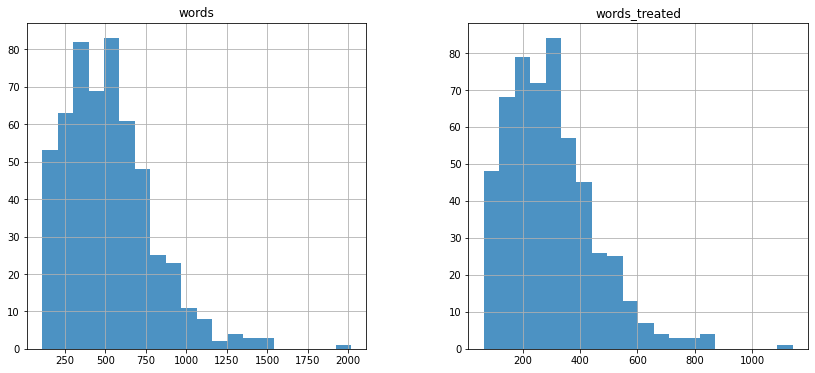

In [80]:
#Plota o DataFrame em histograma para uma avaliação
#Faz a contagem de palavras por cada linha do artigo
df_aj['words_treated'] = df_aj['content_treated'].str.split().str.len()
#df_aj.plot();
df_aj.hist(bins=20, alpha=0.8, figsize=(14,6))
#df_aj.sample(10)

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

#Arnaldo Jabor
XAJ = vectorizer.fit_transform(df_aj['content_treated'])
vocabulary_aj = vectorizer.get_feature_names()
pdXAJ = pd.DataFrame(data=XAJ.toarray(), columns=vocabulary_aj) #.iloc[:,0::2]

#Arnaldo Jabor - Verificar
XVER = vectorizer.fit_transform(df_ver['content_treated'])
vocabulary_ver = vectorizer.get_feature_names()
pdXVER = pd.DataFrame(data=XVER.toarray(), columns=vocabulary_ver) #.iloc[:,0::2]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
len(vocabulary_aj)
df_XAJ = pdXAJ.T
df_XAJ['total_aj'] = df_XAJ.sum(axis=1) 
#pdXAJ[['tudo', 'ser', 'hoje', 'grande', 'brasileiro', 'mundo', 'vida', 'morte', 'morrer', 'otario', 'ahh', 'anos', 'nada', 'futuro']]
pdXAJ



,aaron,abacaxi,abafar,abaixavam,abaixo,abaixou,abaladas,abalado,abalam,abalar,abalaram,abalo,abandonada,abandonado,abandonados,abandonando,abandonar,abandonaram,abandone,abandono,abandonou,abastecendo,abastecimento,abate,abatera,abbott,abby,abc,abdul,aberta,abertamente,abertas,aberto,abertos,abertura,abicair,abin,abismo,abissais,abissal,...,xeque,xi,xiita,xingamento,xingamentos,xingando,xingou,yamaguchi,yang,yates,yoho,york,you,youtube,youtuber,yuval,zalmay,zavascki,zavaski,ze,zebra,zelamos,zelar,zelenski,zelo,zema,zero,zerou,ziblatt,zika,zizek,zomba,zombam,zombar,zombaram,zombaria,zombou,zona,zuckerman,zumbido
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
# Arnaldo Jabor
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
df_XAJ = pdXAJ.T

#Calcula a quantidade de vezes que cada palavra é utilizada
df_XAJ['total_aj'] = df_XAJ.sum(axis=1) 

#Remove as colunas individuais de cada documento para gerar a tabela
df_XAJ.drop(df_XAJ.columns[0:len(df_aj['content'])], axis=1, inplace=True)

#Ordena o resultado final
df_XAJ = df_XAJ.sort_values(by='total_aj', ascending=False)

#Gera a tabela
df_XAJ.head(50)

,total_aj
presidente,2094
bolsonaro,1938
trump,1731
brasil,1001
biden,836
ser,724
pais,704
contra,615
estados,615
eua,599


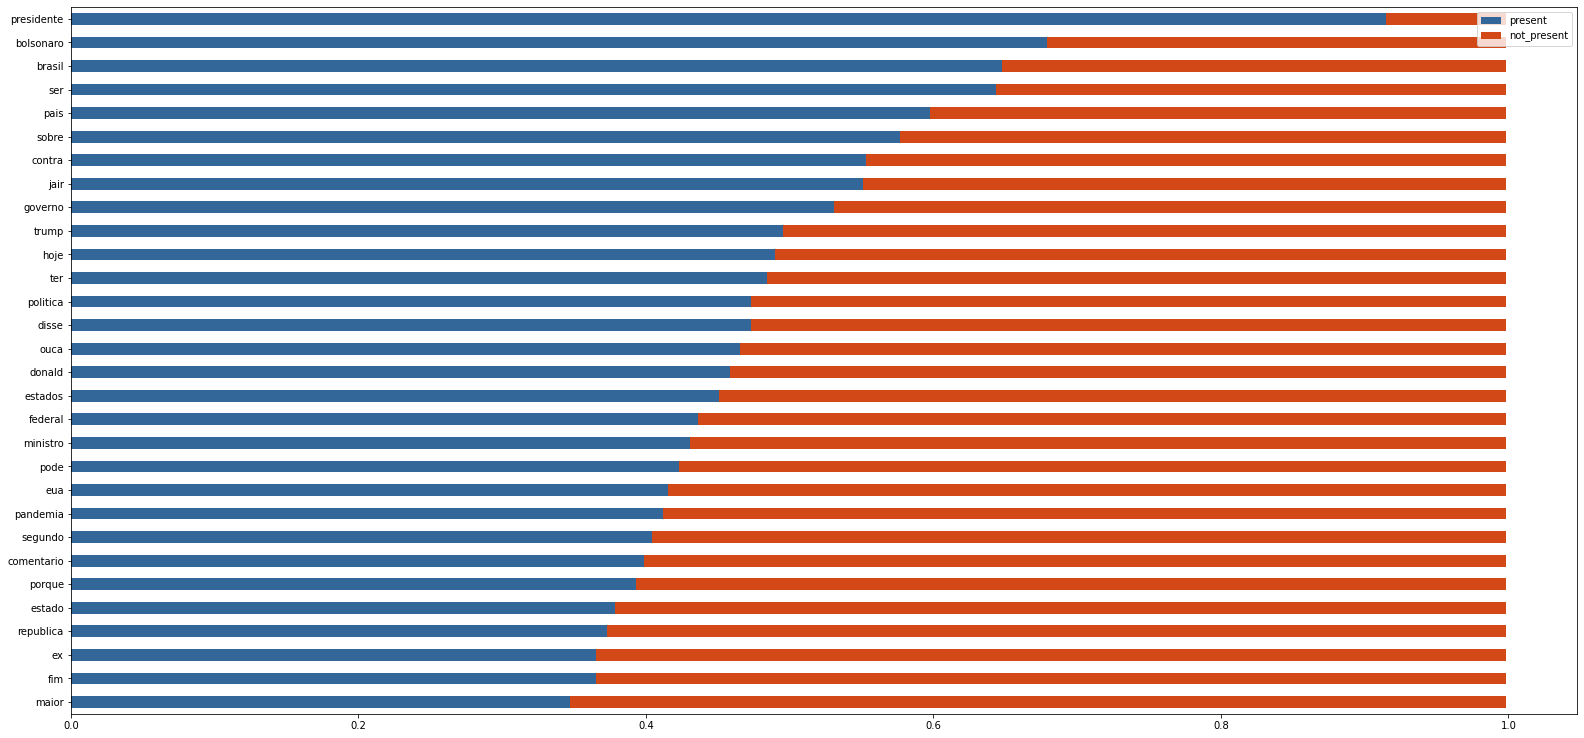

In [84]:
# Arnaldo Jabor
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
pdXAJT = pdXAJ.T

#Calcula a quantidade de documetnos que aquela palavra entrou ou nao entrou
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1) -1) / len(df_aj['content'])
pdXAJT['not_present'] = pdXAJT.eq(0).sum(axis=1) / len(df_aj['content'])

#REmove as colunas individuais de cada documento para gerar o grafico
pdXAJT.drop(pdXAJT.columns[0:len(df_aj['content'])], axis=1, inplace=True)

#Ordena o resultado final
pdXAJT = pdXAJT.sort_values(by='present', ascending=True)

#Gera o gráfico contendo as 30 palavras mais usadas
pdXAJT.tail(30).plot.barh(stacked=True, color=['#336699', '#D34817'], figsize=(27,13))

In [85]:
pdXAJT.tail(30)

,present,not_present
maior,0.346939,0.651206
fim,0.365492,0.632653
ex,0.365492,0.632653
republica,0.372913,0.625232
estado,0.378479,0.619666
porque,0.393321,0.604824
comentario,0.398887,0.599258
segundo,0.404453,0.593692
pandemia,0.411874,0.586271
eua,0.415584,0.582560


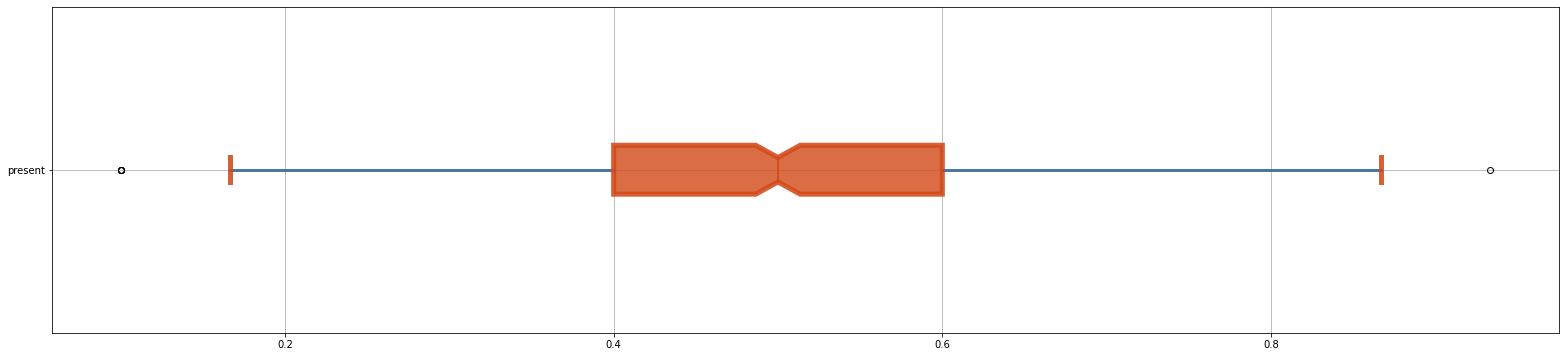

In [86]:
#Reinicia a matriz transposta
pdXAJT = pdXAJ.T

#Recalcula tudo (para evitar problemas como ordem de exceução das celulas)
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1) -1) / len(df_aj['content'])
pdXAJT = pdXAJT.sort_values(by='present', ascending=False)
pdXAJT.drop('present', axis=1, inplace=True)

#Cria uma lista com as 30 palavras mais utilizadas
most_commons = list(pdXAJT.head(30).index.array)

#Filtra as 30 palavras e Traspoe novamente
pdXAJT = pdXAJT.filter(items=most_commons, axis=0).T

# Cria novas colunas com o percentual das 30 palavras mais utilizadas
# presentes em cada corpus
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1)) / 30

#Remove as colunas individuais de cada palavra para gerar o grafico
pdXAJT.drop(pdXAJT.columns[0:30], axis=1, inplace=True)

#Gera o gráfico de boxplor 
pdXAJT.boxplot(vert=False, figsize=(27,6), notch=True, patch_artist=True,  # fill with color               
               boxprops=dict(linestyle='-', linewidth=5, color='#D34817DD', facecolor='#D34817CC'),
               medianprops=dict(linestyle='-', linewidth=2,  color='#D34817DD'),
               whiskerprops=dict(linestyle='-', linewidth=3, color='#336699DD'),
               capprops=dict(linestyle='-', linewidth=5,  color='#D34817DD')               
)


In [87]:
# Arnaldo Jabor
#Reinicia a matriz
pdXAJT = pdXAJ.T

#Mantem o percentual de frequencia de uso para comparação
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1) -1) / len(df_aj['content'])

#Ordena
pdXAJT = pdXAJT.sort_values(by='present', ascending=False)

#Mantem so as 30 primeiras palavras
pdXAJT = pdXAJT.head(30)

#mantem 15 textos aleatorios para comparar com os demais exemplos
#sample_drop =  random.sample(range(0, len(df_aj['content'])), len(df_aj['content']) -0)
#pdXAJT.drop(columns=sample_drop, axis=1, inplace=True)
#pdXAJT.drop(columns='present', axis=1, inplace=True)

# Apaga todas as clunas, pois so queremos manter o indice para avaliar os demais textos
pdXAJT.drop(pdXAJT.columns[0:424], axis=1, inplace=True)


# Cria-se o Saco de Paalvara para os 3 textos que se deseja avaliar
# a autenticidade de Arnaldo Jabor. 
pdXVERT = pdXVER.T.rename(columns={0: "Texto 1", 1: "Texto 2", 2:"CBN"})

In [88]:
pd_comp = pd.merge(left=pdXAJT, right=pdXVERT, how='left', left_index=True, right_index=True)
   
pd_comp.replace(np.nan, 0, inplace=True)
pd_compT = pd_comp.T

pd_compT['most_commons'] = (pd_compT.ne(0).sum(axis=1)) / 30
#pd_compT.drop(pd_compT.columns[0:30], axis=1, inplace=True)
pd_compT.T.round(2)

,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,...,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,present,Texto 1,Texto 2,CBN
presidente,3.00,0.00,0.00,5.00,5.00,6.0,6.00,5.00,2.00,3.00,14.00,0.00,7.00,5.0,3.00,0.00,6.0,1.00,3.00,3.00,4.00,2.00,0.00,2.00,4.0,6.0,7.0,3.00,0.00,0.0,0.0,4.00,0.00,1.00,5.00,0.00,2.00,2.0,4.0,2.0,...,0.00,2.00,0.00,5.00,3.00,5.0,1.00,2.00,2.00,1.0,5.00,7.0,3.00,2.00,1.00,1.0,4.00,3.0,2.00,4.00,1.00,6.0,2.0,4.00,6.00,2.0,3.00,0.00,6.0,7.00,7.00,5.0,9.0,4.00,4.00,4.00,0.91,1.00,0.00,1.0
bolsonaro,5.00,0.00,1.00,9.00,13.00,7.0,6.00,7.00,1.00,0.00,13.00,0.00,9.00,7.0,1.00,0.00,9.0,3.00,2.00,9.00,4.00,3.00,1.00,1.00,14.0,11.0,8.0,4.00,0.00,0.0,0.0,3.00,0.00,1.00,9.00,0.00,0.00,1.0,6.0,0.0,...,0.00,6.00,0.00,1.00,5.00,5.0,1.00,1.00,4.00,5.0,4.00,11.0,7.00,2.00,1.00,3.0,3.00,7.0,2.00,1.00,7.00,6.0,4.0,2.00,7.00,2.0,4.00,1.00,5.0,10.00,9.00,8.0,8.0,8.00,3.00,1.00,0.68,3.00,0.00,3.0
brasil,2.00,1.00,0.00,3.00,2.00,0.0,0.00,0.00,0.00,0.00,2.00,0.00,1.00,0.0,5.00,0.00,3.0,2.00,1.00,2.00,0.00,1.00,1.00,1.00,4.0,2.0,1.0,0.00,0.00,0.0,2.0,1.00,0.00,5.00,0.00,0.00,0.00,1.0,0.0,0.0,...,1.00,2.00,1.00,1.00,2.00,0.0,3.00,0.00,1.00,5.0,5.00,2.0,4.00,0.00,0.00,1.0,1.00,3.0,2.00,4.00,2.00,2.0,5.0,0.00,1.00,3.0,2.00,3.00,10.0,4.00,2.00,4.0,1.0,4.00,1.00,3.00,0.65,0.00,0.00,4.0
ser,1.00,1.00,1.00,2.00,0.00,0.0,2.00,0.00,0.00,0.00,2.00,0.00,0.00,1.0,4.00,0.00,1.0,4.00,0.00,0.00,1.00,0.00,5.00,0.00,1.0,2.0,0.0,0.00,0.00,2.0,0.0,1.00,2.00,1.00,0.00,0.00,1.00,0.0,0.0,2.0,...,0.00,2.00,1.00,5.00,1.00,2.0,1.00,0.00,0.00,1.0,1.00,1.0,1.00,1.00,0.00,0.0,0.00,1.0,2.00,2.00,2.00,2.0,0.0,0.00,3.00,0.0,2.00,4.00,4.0,1.00,1.00,3.0,0.0,1.00,1.00,1.00,0.64,0.00,1.00,1.0
pais,0.00,0.00,0.00,2.00,2.00,2.0,1.00,1.00,0.00,1.00,0.00,1.00,0.00,2.0,1.00,1.00,1.0,2.00,2.00,0.00,0.00,0.00,0.00,2.00,5.0,2.0,0.0,0.00,1.00,0.0,0.0,1.00,0.00,1.00,0.00,1.00,0.00,0.0,2.0,1.0,...,1.00,3.00,0.00,0.00,0.00,1.0,0.00,0.00,3.00,1.0,3.00,1.0,1.00,1.00,0.00,0.0,0.00,0.0,2.00,3.00,0.00,0.0,1.0,0.00,1.00,1.0,0.00,0.00,3.0,0.00,0.00,0.0,0.0,2.00,2.00,2.00,0.60,0.00,0.00,2.0
sobre,1.00,1.00,0.00,0.00,2.00,1.0,1.00,2.00,0.00,1.00,1.00,1.00,1.00,1.0,1.00,0.00,3.0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.0,0.0,0.0,0.00,0.00,0.0,0.0,1.00,0.00,0.00,1.00,2.00,1.00,6.0,2.0,2.0,...,0.00,0.00,2.00,2.00,2.00,2.0,0.00,0.00,0.00,0.0,1.00,1.0,0.00,0.00,2.00,0.0,0.00,0.0,0.00,1.00,0.00,0.0,2.0,1.00,2.00,2.0,0.00,0.00,2.0,1.00,3.00,5.0,2.0,1.00,3.00,3.00,0.58,0.00,0.00,3.0
contra,0.00,0.00,1.00,0.00,0.00,1.0,1.00,0.00,0.00,0.00,2.00,0.00,0.00,1.0,2.00,1.00,0.0,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1.00,0.00,3.00,0.00,0.00,1.00,2.0,0.0,0.0,...,0.00,0.00,0.00,2.00,1.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,1.00,0.00,0.00,0.0,0.00,0.0,1.00,0.00,1.00,1.0,0.0,0.00,1.00,0.0,1.00,1.00,0.0,0.00,0.00,1.0,3.0,0.00,0.00,0.00,0.55,1.00,0.00,1.0
jair,1.00,0.00,0.00,1.00,2.00,1.0,2.00,1.00,0.00,0.00,2.00,0.00,1.00,1.0,1.00,0.00,1.0,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.0,1.0,1.0,1.00,0.00,0.0,0.0,1.00,0.00,0.00,3.00,0.00,0.00,1.0,1.0,0.0,...,0.00,1.00,0.00,1.00,0.00,0.0,1.00,1.00,0.00,1.0,1.00,1.0,1.00,0.00,0.00,0.0,1.00,0.0,1.00,0.00,0.00,1.0,1.0,0.00,1.00,1.0,2.00,0.00,2.0,1.00,1.00,1.0,1.0,1.00,2.00,1.00,0.55,0.00,0.00,1.0
governo,1.00,0.00,0.00,0.00,0.00,1.0,1.00,1.00,1.00,0.00,4.00,0.00,0.00,1.0,0.00,0.00,2.0,0.00,2.00,6.00,2.00,1.00,0.00,1.00,1.0,0.0,5.0,0.00,0.00,0.0,0.0,2.00,0.00,1.00,0.00,0.00,0.00,0.0,2.0,0.0,...,0.00,0.00,0.00,0.00,4.00,4.0,0.00,0.00,0.00,1.0,1.00,2.0,1.00,1.00,0.00,0.0,1.00,0.0,1.00,0.00,0.00,0.0,0.0,5.00,2.00,0.0,1.00,0.00,8.0,0.00,0.00,0.0,2.0,0.00,2.00,0.00,0.53,0.00,2.00,1.0
trump,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,2.0,0.00,0.00,0.0,0.0,0.00,0.00,